<font size = 8> Regression with the Pseudoinverse

***

## Libraries & Stuff

In [29]:
import numpy as np

In [ ]:
import torch

In [ ]:
import tensorflow as tf

In [21]:
import matplotlib.pyplot as plt

.DS_Store files

find .  -name ".DS_Store" -depth -exec rm {} \;

In [1]:
def plot_vectors(vectors, colors):
    """
    Plot one or more vectors in a 2D plane, specifying a color for each. 

    Arguments
    ---------
    vectors: list of lists or of arrays
        Coordinates of the vectors to plot. For example, [[1, 3], [2, 2]] 
        contains two vectors to plot, [1, 3] and [2, 2].
    colors: list
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
        
    Example
    -------
    plot_vectors([[1, 3], [2, 2]], ['red', 'blue'])
    plt.xlim(-1, 4)
    plt.ylim(-1, 4)
    """
    plt.figure()
    plt.axvline(x=0, color='lightgray')
    plt.axhline(y=0, color='lightgray')

    for i in range(len(vectors)):
        x = np.concatenate([[0,0],vectors[i]])
        plt.quiver([x[0]], [x[1]], [x[2]], [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=colors[i],)

In [2]:
# function to convert column of matrix to 1D vector: 
def vectorfy(mtrx, clmn):
    return np.array(mtrx[:,clmn]).reshape(-1)

***

In [2]:
# fit a line to points

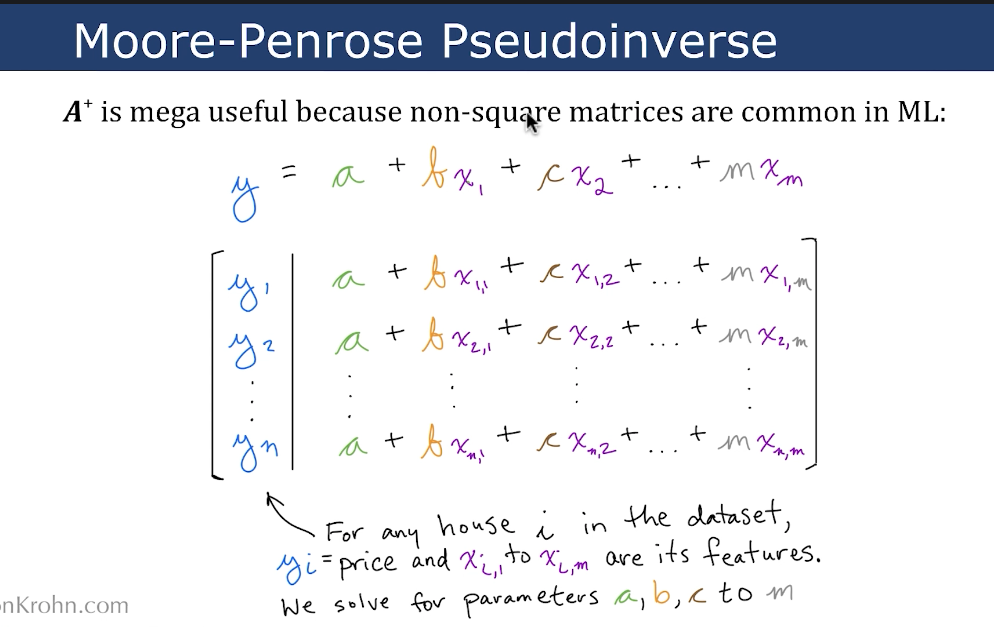

In [3]:
# we would have about a dozen features but many many more rows

# is m != n, with n far higher than m

In [5]:
# a is the average house price

# y = a + bx1 + cx2 + dx3 + ex4 ..

In [6]:
# we can use the Moore-Penrose Pseudoinverse in this case

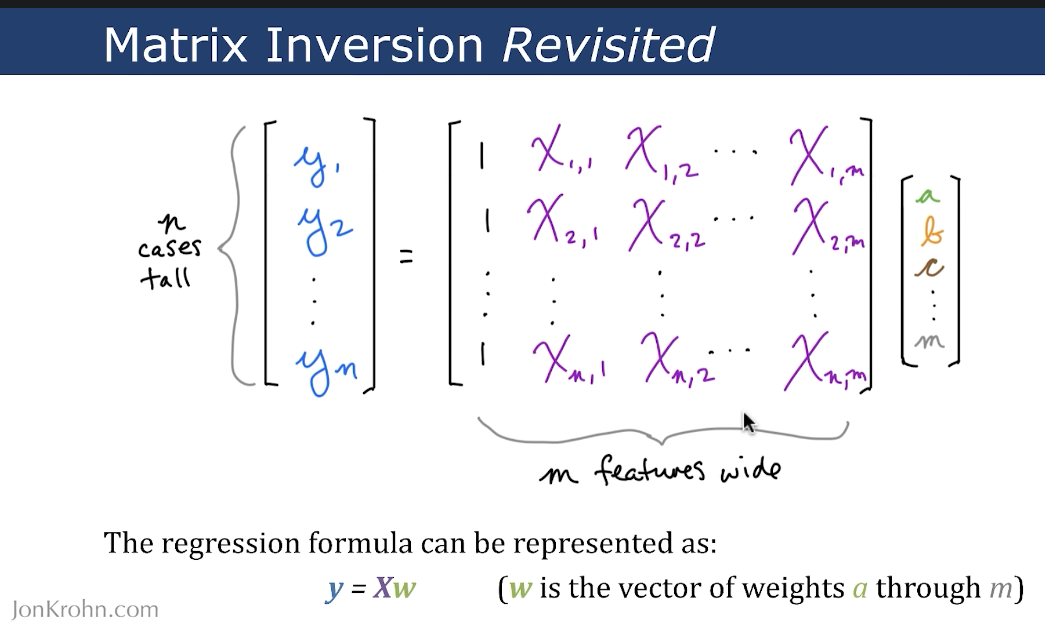

In [7]:
# m features

In [8]:
# vector of unknowns -- a,b,c,d,e..

In [9]:
# this is the problem we are trying to solve

In [10]:
# y = Xw

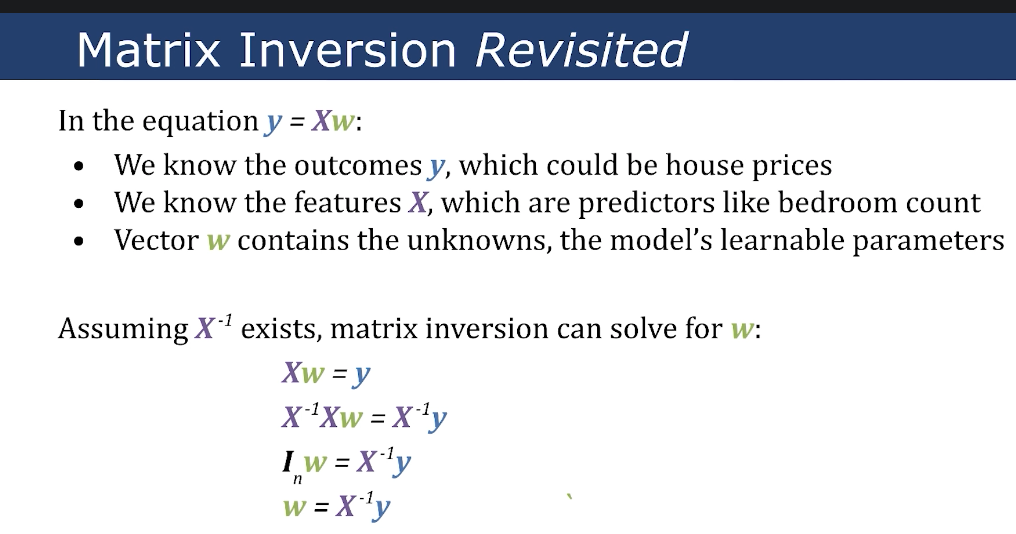

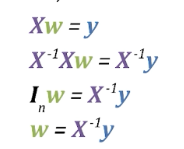

In [13]:
# X.w = y

# Xinv.X.w = Xinv.y

# I.w = Xinv.y

# w = Xinv.y

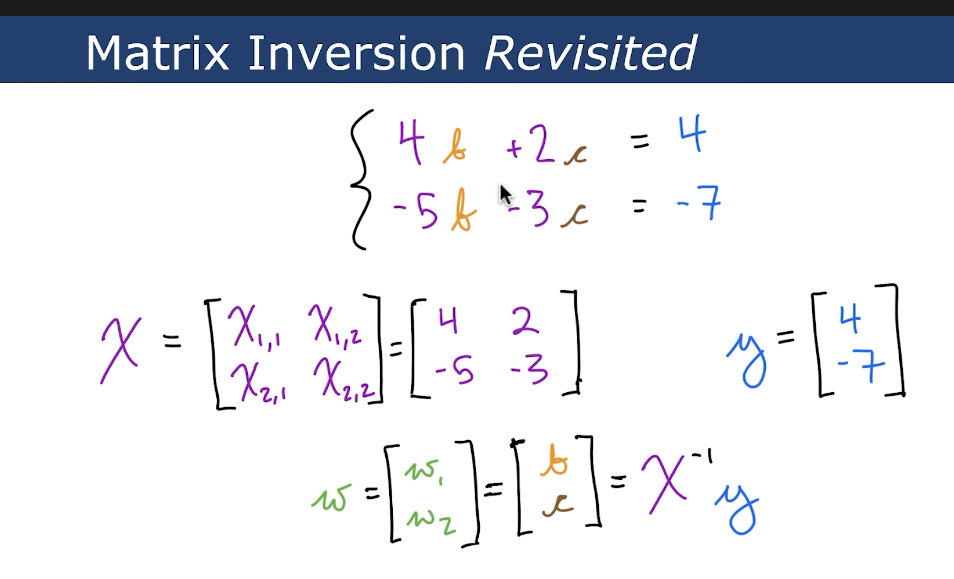

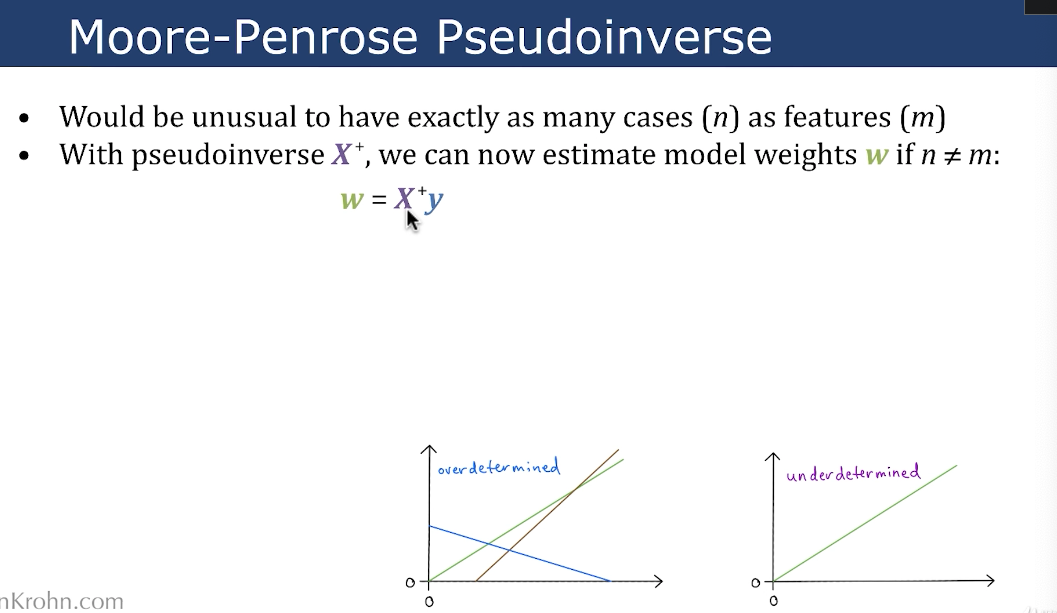

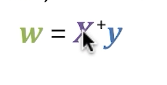

In [14]:
# see that we have Xplus insread of Xinv 

# this is the pseudoinverse

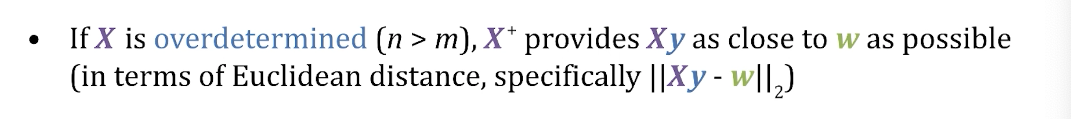

In [16]:
# this is typical of a regression problem

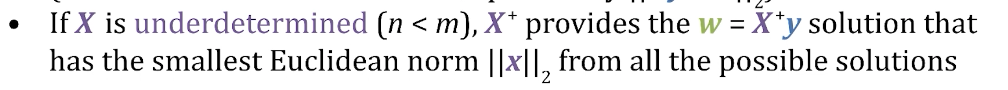

In [15]:
# this is a scenario in deep learning model

***

***

For regression problems, we typically have many more cases ($n$, or rows of $X$) than features to predict (columns of $X$). Let's solve a miniature example of such an overdetermined situation. 

We have eight data points ($n$ = 8): 

In [17]:
x1 = [0, 1, 2, 3, 4, 5, 6, 7.] 

# E.g.: Dosage of drug for treating Alzheimer's disease

In [18]:
y = [1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37] 

# E.g.: Patient's "forgetfulness score"

In [19]:
title = 'Clinical Trial'
xlabel = 'Drug dosage (mL)'
ylabel = 'Forgetfulness'

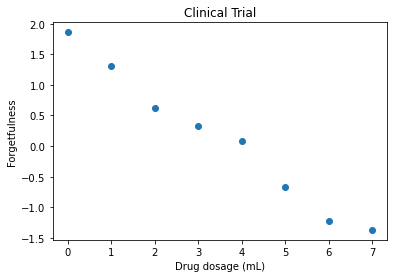

In [23]:
# scatter plot

fig, ax = plt.subplots()
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
_ = ax.scatter(x1, y)

Although it appears there is only one predictor ($x_1$), our model requires a second one (let's call it $x_0$) in order to allow for a $y$-intercept. Without this second variable, the line we fit to the plot would need to pass through the origin (0, 0). The $y$-intercept is constant across all the points so we can set it equal to `1` across the board:

In [24]:
x0 = np.ones(8)
x0

array([1., 1., 1., 1., 1., 1., 1., 1.])

Concatenate $x_0$ and $x_1$ into a matrix $X$: 

In [25]:
X = np.concatenate((np.matrix(x0).T, np.matrix(x1).T), axis=1)

In [26]:
X

matrix([[1., 0.],
        [1., 1.],
        [1., 2.],
        [1., 3.],
        [1., 4.],
        [1., 5.],
        [1., 6.],
        [1., 7.]])

In [27]:
# the transpose is done so that both values are as columns in a matrix

In [28]:
# now that we have X, we can start solving for the weights

***

From the slides, we know that we can calculate the weights $w$ using the equation $w = X^+y$: 

In [30]:
w = np.dot(np.linalg.pinv(X), y)

In [31]:
w

matrix([[ 1.76      , -0.46928571]])

In [32]:
# y intercept is 1.76 and the slope of the line is -.46

The first weight corresponds to the $y$-intercept of the line, which is typically denoted as $b$: 

In [33]:
# y intercept is typically denoted as b

In [34]:
b = np.asarray(w).reshape(-1)[0]

In [35]:
b

1.7599999999999996

While the second weight corresponds to the slope of the line, which is typically denoted as $m$: 

In [36]:
m = np.asarray(w).reshape(-1)[1]

In [37]:
m

-0.4692857142857143

With the weights we can plot the line to confirm it fits the points: 

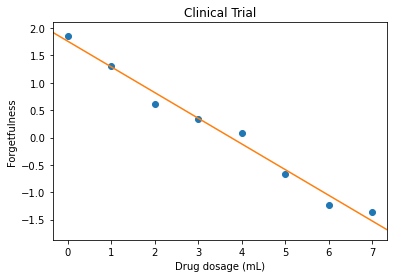

In [38]:
fig, ax = plt.subplots()

plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)

ax.scatter(x1, y)

x_min, x_max = ax.get_xlim()
y_at_xmin = m*x_min + b
y_at_xmax = m*x_max + b

ax.set_xlim([x_min, x_max])
_ = ax.plot([x_min, x_max], [y_at_xmin, y_at_xmax], c='C01')